# 1. Reading and Understanding the dataset

## 1 Reading the dataset

In [186]:
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('../datasets/spam_assassin.csv')
df = df.rename(columns={
  'text': 'email',
  'target': 'label',
})

df.head()

,email,label
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5796 non-null   object
 1   label   5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [188]:
df.describe()

,label
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [189]:
df.isna().any()

email    False
label    False
dtype: bool

In [190]:
df.isnull().any()

email    False
label    False
dtype: bool

In [191]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 467


In [192]:
# Converting the data type to string
df['email'] = df['email'].astype(str).str.lower()
df.head()

,email,label
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0
1,from gort44@excite.com mon jun 24 17:54:21 200...,1
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0


C:\Users\ACER\AppData\Local\Temp\ipykernel_22396\2506992791.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_labels)


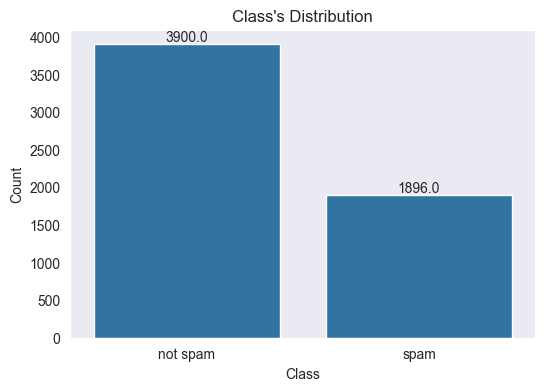

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['label'])

# Define class labels
class_labels = ['not spam', 'spam']

# Set x-axis tick labels
ax.set_xticklabels(class_labels)

plt.title("Class's Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y')  # Show only horizontal grid lines

# Add count labels on top of each bar
for p in ax.patches:
  ax.annotate(
    f'{p.get_height()}',
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 5),
    textcoords='offset points')

plt.show()

## 2 Visualizing the dataset

### 2.1 Word Cloud

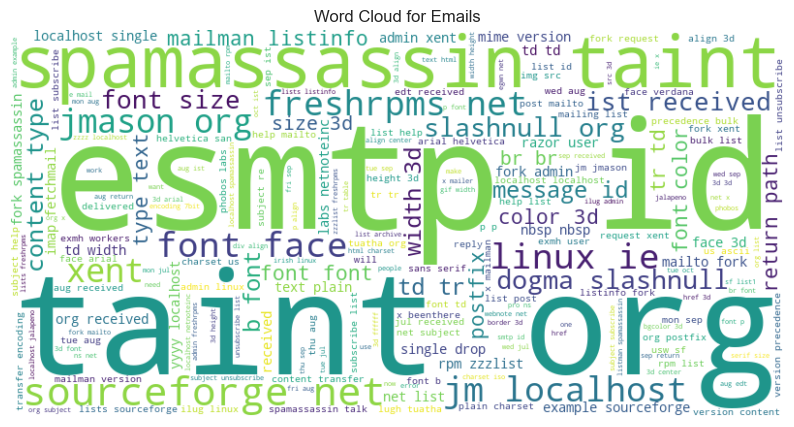

In [194]:
from wordcloud import WordCloud

# Generate word cloud for the 'email' column
text = " ".join(df['email'])
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=4) \
             .generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Emails")
plt.show()

### 2.2 Word Count

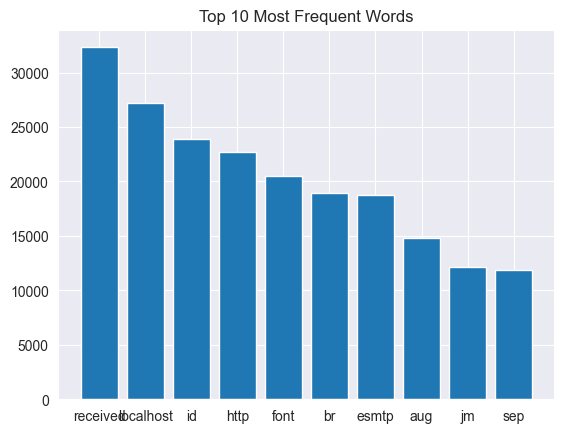

In [195]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('averaged_perceptron_tagger_eng')

# Example text data
text = " ".join(df['email'])

# Tokenize and remove stopwords/punctuation
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(text.lower())
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get word frequencies
word_freq = Counter(tokens)
common_words = word_freq.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Plot the bar chart
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words")
plt.show()

### 2.3 Email Lengths Distribution

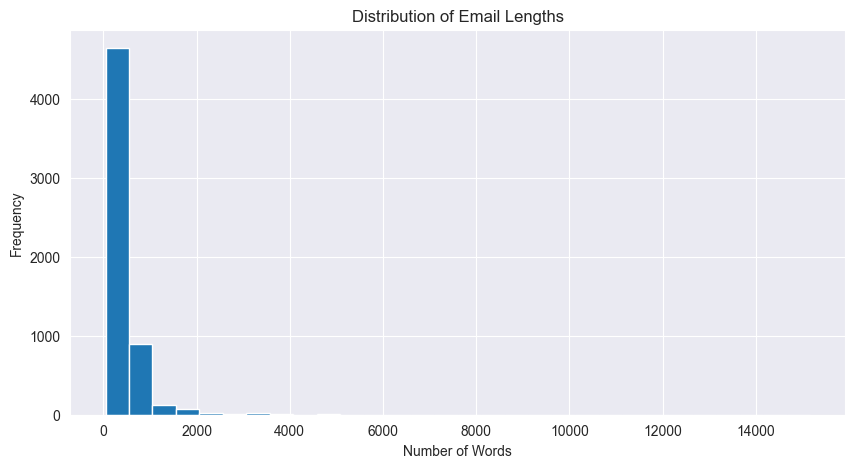

In [196]:
email_lengths = df['email'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(email_lengths, bins=30)
plt.title('Distribution of Email Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### 2.4 Common N-grams

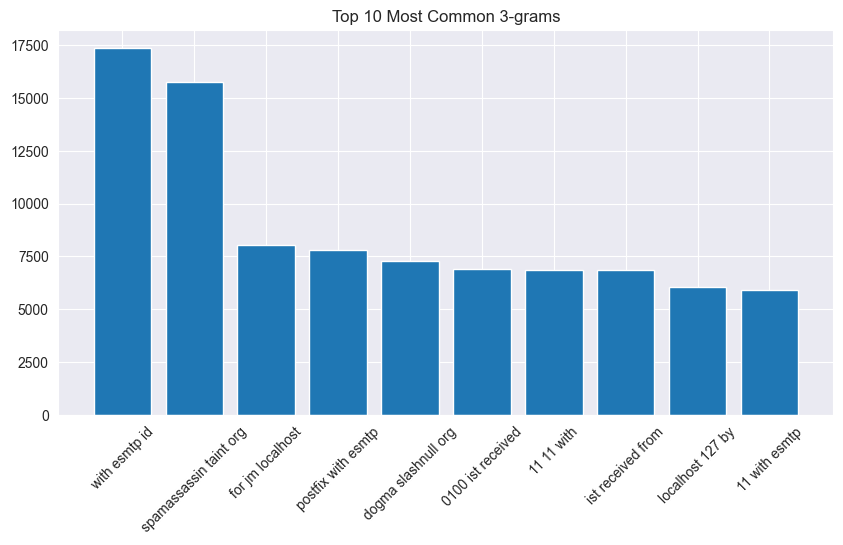

In [197]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def plot_ngram(ngram_range: int, max_words: int):
  # Create a bigram (n-word) count vectorizer
  vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
  X = vectorizer.fit_transform(df['email'])

  # Sum up the counts of each bigram
  ngram_counts = X.sum(axis=0)
  ngrams = vectorizer.get_feature_names_out()
  ngram_freq = [(ngrams[i], ngram_counts[0, i]) for i in range(len(ngrams))]
  ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:max_words]

  # Plot top 20 bigrams
  ngram_words, ngram_counts = zip(*ngram_freq)
  plt.figure(figsize=(10, 5))
  plt.bar(ngram_words, ngram_counts)
  plt.xticks(rotation=45)
  plt.title(f'Top {max_words} Most Common {ngram_range}-grams')
  plt.show()

plot_ngram(ngram_range=3, max_words=10)

### 2.5 POS Tag Frequency

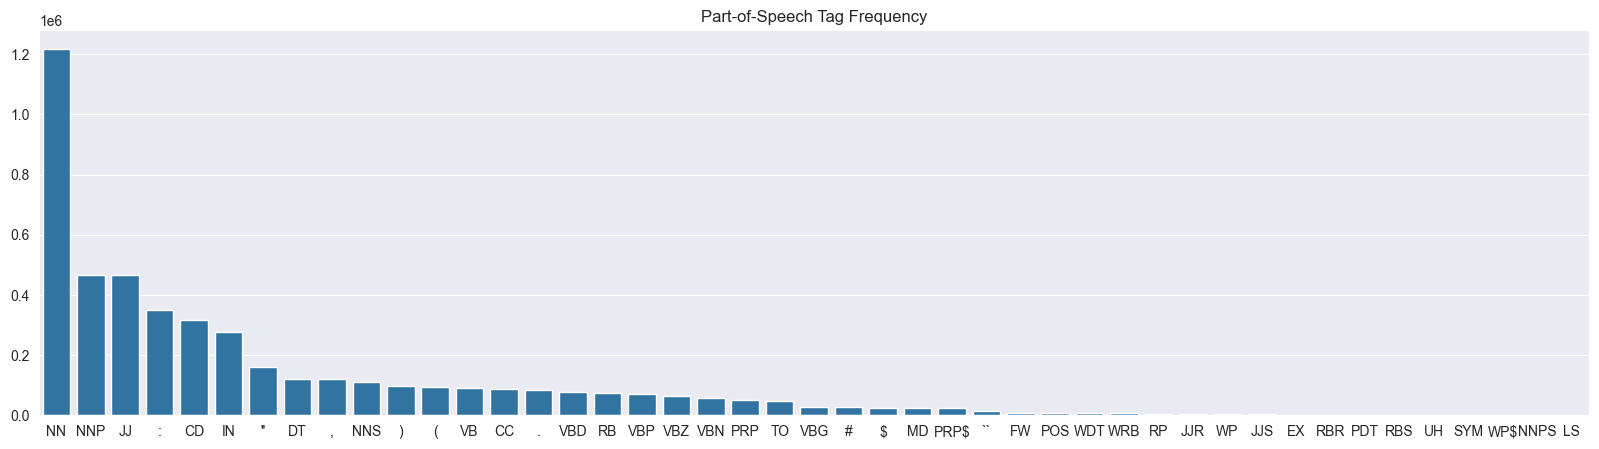

In [198]:
# Tokenize text into words
text_data = ' '.join(df['email'])
words = nltk.word_tokenize(text_data)

# Tag the words with their POS tags
pos_tags = nltk.pos_tag(words)

# Count the frequency of each POS tag
pos_counts = Counter(tag for word, tag in pos_tags)

# Plot the POS tag frequencies
pos_labels, pos_freq = zip(*pos_counts.most_common())
plt.figure(figsize=(20, 5))
sns.barplot(x=list(pos_labels), y=list(pos_freq))
plt.title('Part-of-Speech Tag Frequency')
plt.show()

### 2.6 TF-IDF Visualization

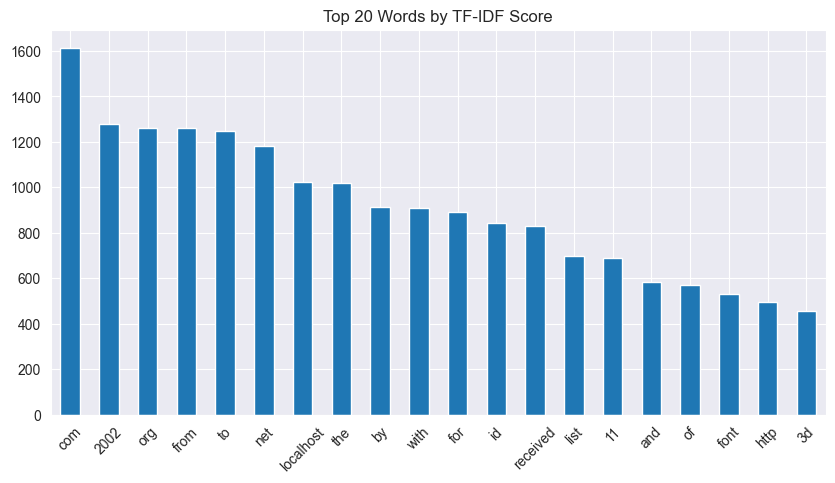

In [199]:
# Compute TF-IDF scores
tfidf = TfidfVectorizer(max_features=20)
X = tfidf.fit_transform(df['email'])

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# Visualize the top 20 TF-IDF scores
tfidf_sum = tfidf_df.sum(axis=0)
tfidf_sorted = tfidf_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
tfidf_sorted.plot(kind='bar')
plt.title('Top 20 Words by TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

# 2. Preprocessing the dataset

## 1 Preprocessing Function

In [200]:
import spacy
# !{sys.executable} -m spacy download en_core_web_sm

nlp = spacy.load(
  "en_core_web_sm",
  # disable=['parser', 'ner']
)

def preprocess_dataset(
    dataframe: DataFrame,
    email_col: str = 'email',
    preprocessed_col: str = 'preprocessed_email',
    placeholders: set = None,
    html_placeholder: str = 'HTML',
    url_placeholder: str = 'URL',
    email_address_placeholder: str = 'EMAIL_ADDRESS',
    number_placeholder: str = 'NUMBER',
    special_char_placeholder: str = 'SPECIAL_CHARACTER',
) -> DataFrame:
  """
  An Overall Preprocessing function for Datasets

  :param dataframe: Pandas DataFrame for preprocessing
  :param email_col: The email column name.
  :param preprocessed_col: The preprocessed email column.
  :param placeholders: Set of words or tokens to keep.
  :param html_placeholder: The placeholder for html texts.
  :param url_placeholder: The placeholder for url texts.
  :param email_address_placeholder: The placeholder for email texts.
  :param number_placeholder: The placeholder for numbers.
  :param special_char_placeholder: The placeholder for special characters.
  :return: The input DataFrame with a preprocessed email column.
  """

  # Step 1 Remove Duplicate Rows and Null.
  dataframe = dataframe.drop_duplicates().dropna()



  # Step 2 Replace Links (HTML, URLs, Emails).
  # HTMLs
  dataframe.loc[:, preprocessed_col] = dataframe[email_col].str.replace(
    pat=r'<.*?>',
    repl=html_placeholder+' ',
    regex=True
  )
  # URLs
  dataframe.loc[:, preprocessed_col] = dataframe[preprocessed_col].str.replace(
    pat=r'https?://\S+|www\.\S+',
    repl=url_placeholder+' ',
    regex=True
  )
  # Email Addresses
  dataframe.loc[:, preprocessed_col] = dataframe[preprocessed_col].str.replace(
    pat=r'\S+@\S+',
    repl=email_address_placeholder+' ',
    regex=True
  )



  # Step 3 Tokenize, removing stop words, whitespace and
  # replacing numbers, special characters, and lemmatize emails.
  if placeholders is None:
    placeholders = {html_placeholder, url_placeholder, email_address_placeholder}

  texts = dataframe[preprocessed_col].astype(str).tolist()
  correct_index = dataframe.index
  processed_mails = []

  for doc in nlp.pipe(texts, batch_size=400, n_process=6):
    processed_texts = []

    # Step 3.1: Filter the words.
    for token in doc:
      # Condition 0: Check if the token is one of the predefined placeholders.
      if token in placeholders:
        processed_texts.append(token)
      # Condition 1: Keep and lemmatize alpha tokens that aren't stop words.
      elif token.is_alpha and not token.is_stop:
        processed_texts.append(token.lemma_)
      # Condition 2: Check for number-like tokens (that aren't alpha/stopwords).
      elif token.like_num:
        processed_texts.append(number_placeholder)
      # Condition 3: Replace other non-alpha, non-space, non-number tokens.
      elif not token.is_alpha and not token.is_space:
        processed_texts.append(special_char_placeholder)

    # Step 3.2: Remove duplicates from the processed text.
    seen_texts = set()
    unique_ordered_texts = []
    for word in processed_texts:
      # Check if the text is already in the email.
      if word not in seen_texts:
        unique_ordered_texts.append(word)
        seen_texts.add(word)

    processed_mails.append(' '.join(unique_ordered_texts))

  dataframe.loc[:, preprocessed_col] = pd.Series(
    processed_mails,
    index=correct_index
  )

  return dataframe

In [201]:
df = preprocess_dataset(df)

df.head()

,email,label,preprocessed_email
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0,SPECIAL_CHARACTER mon jul NUMBER return path h...
1,from gort44@excite.com mon jun 24 17:54:21 200...,1,SPECIAL_CHARACTER mon jun NUMBER return path d...
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1,SPECIAL_CHARACTER mon jul NUMBER return path h...
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1,SPECIAL_CHARACTER mon jun NUMBER return path d...
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0,SPECIAL_CHARACTER mon aug NUMBER return path h...


In [202]:
display(df)

# df.describe()

,email,label,preprocessed_email
0,from ilug-admin@linux.ie mon jul 29 11:28:02 2...,0,SPECIAL_CHARACTER mon jul NUMBER return path h...
1,from gort44@excite.com mon jun 24 17:54:21 200...,1,SPECIAL_CHARACTER mon jun NUMBER return path d...
2,from fork-admin@xent.com mon jul 29 11:39:57 2...,1,SPECIAL_CHARACTER mon jul NUMBER return path h...
3,from dcm123@btamail.net.cn mon jun 24 17:49:23...,1,SPECIAL_CHARACTER mon jun NUMBER return path d...
4,from ilug-admin@linux.ie mon aug 19 11:02:47 2...,0,SPECIAL_CHARACTER mon aug NUMBER return path h...
...,...,...,...
5791,from ilug-admin@linux.ie mon jul 22 18:12:45 2...,0,SPECIAL_CHARACTER mon jul NUMBER return path h...
5792,from fork-admin@xent.com mon oct 7 20:37:02 20...,0,SPECIAL_CHARACTER mon oct NUMBER return path h...
5793,received: from hq.pro-ns.net (localhost [127.0...,1,receive SPECIAL_CHARACTER localhost NUMBER esm...
5794,from razor-users-admin@lists.sourceforge.net t...,0,SPECIAL_CHARACTER thu sep NUMBER return path h...


## 2 Vectorizing the emails

In [203]:
vectorizer = TfidfVectorizer(
  lowercase=False,
  min_df=80,
  max_features=1000,
  # vocabulary={'HTML', 'URL', 'EMAIL_ADDRESS', 'NUMBER', 'SPECIAL_CHARACTER'},
)

vectorizer.fit(df['preprocessed_email'])
vector_matrix = vectorizer.transform(df['preprocessed_email'])
vector_df = pd.DataFrame(
  vector_matrix.toarray(),
  columns=vectorizer.get_feature_names_out()
)

vector_df.head()

,HTML,NUMBER,SPECIAL_CHARACTER,URL,ability,able,absolutely,abuse,accept,acceptable,...,world,worry,worth,write,wrong,ximian,yahoo,year,yes,zzzzteana
0,0.033673,0.031284,0.031284,0.00000,0.0,0.120882,0.0,0.0,0.0,0.0,...,0.0,0.0,0.137451,0.0,0.125773,0.0,0.0,0.000000,0.000000,0.0
1,0.037669,0.034996,0.034996,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.102342,0.128541,0.0
2,0.037981,0.035285,0.035285,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.103187,0.129603,0.0
3,0.075720,0.070346,0.070346,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.044836,0.041654,0.041654,0.10014,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


# 3. Training and Prediction

## 1 Assigning Training and Testing Sets

In [204]:
X = vector_df
X[:5]

,HTML,NUMBER,SPECIAL_CHARACTER,URL,ability,able,absolutely,abuse,accept,acceptable,...,world,worry,worth,write,wrong,ximian,yahoo,year,yes,zzzzteana
0,0.033673,0.031284,0.031284,0.00000,0.0,0.120882,0.0,0.0,0.0,0.0,...,0.0,0.0,0.137451,0.0,0.125773,0.0,0.0,0.000000,0.000000,0.0
1,0.037669,0.034996,0.034996,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.102342,0.128541,0.0
2,0.037981,0.035285,0.035285,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.103187,0.129603,0.0
3,0.075720,0.070346,0.070346,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.044836,0.041654,0.041654,0.10014,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [205]:
y = df.iloc[:, 1]
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 2 Models Train and Predict

### 2.1 Random Forest Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
  n_estimators=1000,
  max_depth=100,
  min_samples_split=4,
  min_samples_leaf=2
)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
y_rf_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [208]:
y_rf_train_pred = rf.predict(X_train)
y_rf_train_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### 2.2 Support Vector Machine

In [209]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_svm_pred = svm.predict(X_test)
y_svm_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [210]:
y_svm_train_pred = svm.predict(X_train)
y_svm_train_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### 2.3 KNN

In [211]:
from sklearn.neighbors import KNeighborsClassifier

# Tested and validated metrics: cosine, jaccard, correlation, infinity, dice, chebyshev, braycurtis
knn = KNeighborsClassifier(metric='jaccard',n_neighbors=3)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)
y_knn_pred[:5]

D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([0, 1, 0, 1, 0], dtype=int64)

In [212]:
y_knn_train_pred = knn.predict(X_train)
y_knn_train_pred[:5]

D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([0, 0, 0, 0, 0], dtype=int64)

### 2.4 Multinomial Naive Bayes

In [213]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_nb_pred = nb.predict(X_test)
y_nb_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [214]:
y_nb_train_pred = nb.predict(X_train)
y_nb_train_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### 2.5 Neural Networks

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

nn = Sequential()

"""
  - Adding the first layer, with 64 neurons
  - ReLU (Rectified Linear Unit) is a non-linear activation function.
    + It outputs the input if it's positive, and zero otherwise.
    + ReLU introduces non-linearity to the network, which helps it learn complex patterns.
    + Otherwies, the model would only learn linear relationships.
"""
nn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Doing similar to above
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='relu'))

# Output layer (binary classification)
"""
  - The sigmoid activation function
    + Squashes the output into a range between 0 and 1, making it suitable for binary classification.
    + The network will output a probability that a given input belongs to class 1 (the other class will have probability 0).
"""
nn.add(Dense(1, activation='sigmoid'))

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

nn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train_np, y_train_np, epochs=10, validation_data=(X_test_np, y_test_np))

y_nn_pred = nn.predict(X_test_np)
y_nn_pred[:5]

Epoch 1/10
134/134 [==============================] - 1s 3ms/step - loss: 0.2135 - accuracy: 0.9334 - val_loss: 0.0195 - val_accuracy: 0.9972
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0133 - val_accuracy: 0.9981
Epoch 3/10
134/134 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9972
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9972
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 5.8351e-04 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9962
Epoch 6/10
134/134 [==============================] - 0s 2ms/step - loss: 3.4072e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9962
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 2.3565e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0

array([[1.1420153e-04],
       [9.9998289e-01],
       [3.2953370e-08],
       [9.9990451e-01],
       [4.3603756e-09]], dtype=float32)

In [216]:
y_nn_pred = nn.predict(X_train_np)
y_nn_pred[:5]

134/134 [==============================] - 0s 952us/step


array([[2.6572629e-08],
       [1.4689816e-07],
       [2.8838558e-04],
       [1.0810255e-06],
       [1.2944806e-06]], dtype=float32)

### 2.6 XGBoost

In [217]:
import xgboost

xgb = xgboost.XGBClassifier(
  eta=0.005,
  n_estimators=5000,
  max_depth=3,
  subsample=0.8,
  colsample_bytree=0.8,
  reg_lambda=10,
  min_child_weight=5,
  gamma=0.5,
  objective='binary:logistic', # Or your objective
  eval_metric='logloss',
  early_stopping_rounds=50,
)

eval_set = [(X_test, y_test)]
xgb.fit(
  X_train, y_train,
  eval_set=eval_set,
  verbose=100,
)

y_xgb_pred = xgb.predict(X_test)
y_xgb_pred[:5]

[0]	validation_0-logloss:0.62135
[100]	validation_0-logloss:0.40480
[200]	validation_0-logloss:0.28554
[300]	validation_0-logloss:0.21827
[400]	validation_0-logloss:0.17696
[500]	validation_0-logloss:0.14922
[600]	validation_0-logloss:0.12922
[700]	validation_0-logloss:0.11390
[800]	validation_0-logloss:0.10244
[900]	validation_0-logloss:0.09331
[1000]	validation_0-logloss:0.08596
[1100]	validation_0-logloss:0.07977
[1200]	validation_0-logloss:0.07470
[1300]	validation_0-logloss:0.07018
[1400]	validation_0-logloss:0.06639
[1500]	validation_0-logloss:0.06310
[1600]	validation_0-logloss:0.06010
[1700]	validation_0-logloss:0.05762
[1800]	validation_0-logloss:0.05523
[1900]	validation_0-logloss:0.05321
[2000]	validation_0-logloss:0.05128
[2100]	validation_0-logloss:0.04956
[2200]	validation_0-logloss:0.04805
[2300]	validation_0-logloss:0.04652
[2400]	validation_0-logloss:0.04529
[2500]	validation_0-logloss:0.04404
[2600]	validation_0-logloss:0.04301
[2700]	validation_0-logloss:0.04205
[280

array([0, 1, 0, 1, 0])

In [218]:
y_xgb_train_pred = xgb.predict(X_train)
y_xgb_train_pred[:5]

array([0, 0, 0, 0, 0])

# 4. Evaluation

In [219]:
loss, accuracy = nn.evaluate(X_test_np, y_test_np)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

34/34 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9962
Test Loss: 0.0095
Test Accuracy: 0.9962


In [220]:
train_loss, train_accuracy = nn.evaluate(X_train_np, y_train_np)
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

134/134 [==============================] - 0s 1ms/step - loss: 8.1797e-05 - accuracy: 1.0000
Train Loss: 0.0001
Train Accuracy: 1.0000


In [221]:
# from google.colab import

# download(y_rf_pred, 'rf_pred.csv')

## 1 Raw Texts

In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def predict_and_evaluate(X_test_set: list, y_test_set: list):
  models = [
    ["Random Forest", rf],
    ["SVM", svm],
    ["KNN", knn],
    ["Naive Bayes", nb],
    ["XGBoost", xgb],
  ]

  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []
  loss_list = []
  model_names = []

  for model_name, model in models:
    y_pred = model.predict(X_test_set)
    print(f"Evaluation for {model_name}:")
  
    accuracy = accuracy_score(y_test_set, y_pred)
    precision = precision_score(y_test_set, y_pred)
    recall = recall_score(y_test_set, y_pred)
    f1 = f1_score(y_test_set, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    if hasattr(model, "predict_proba"):
      # Get probabilities for the positive class (usually class 1)
      y_pred_proba = model.predict_proba(X_test_set)[:, 1]
      loss = log_loss(y_test_set, y_pred_proba)
      loss_list.append(loss)
      print(f"Loss: {loss:.4f}\n")
    else:
      loss_list.append(0)
      print(f"Model does not support probability\n")
  
    model_names.append(model_name)

  return accuracy_list, precision_list, recall_list, f1_list, loss_list, model_names

In [225]:
accuracy_list_origin, precision_list_origin, recall_list_origin, f1_list_origin, loss_list_origin, model_names_origin = predict_and_evaluate(X_test, y_test)

Evaluation for Random Forest:
Accuracy: 0.9859
Precision: 0.9939
Recall: 0.9615
F1 Score: 0.9774
Loss: 0.0837

Evaluation for SVM:
Accuracy: 0.9972
Precision: 1.0000
Recall: 0.9911
F1 Score: 0.9955
Loss: 0.0053



D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Evaluation for KNN:
Accuracy: 0.9841
Precision: 0.9908
Recall: 0.9586
F1 Score: 0.9744


D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Loss: 0.2866

Evaluation for Naive Bayes:
Accuracy: 0.9822
Precision: 0.9969
Recall: 0.9467
F1 Score: 0.9712
Loss: 0.0625

Evaluation for XGBoost:
Accuracy: 0.9878
Precision: 0.9939
Recall: 0.9675
F1 Score: 0.9805
Loss: 0.0312



## 2 Graphs

### 2.1 Model Metrics

In [226]:
import numpy as np

def visualize_comparison(
    accuracy_list: list,
    precision_list: list,
    recall_list: list,
    f1_list: list,
    loss_list: list,
    model_names: list
):
  """
  Drawing a Graph to visualize the comparison of the models

  :param accuracy_list: List of models' accuracy
  :param precision_list: List of models' precision
  :param recall_list: List of models' recall
  :param f1_list: List of models' f1
  :param loss_list: List of models' loss
  :param model_names: List of models' model
  :return: A Bar Chart comparing the results of different models
  """

  metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
  x = np.arange(len(metrics))  # X locations for the groups

  fig, ax = plt.subplots(figsize=(20, 6))
  width = 0.16

  # Plot each model's results as a bar
  for i, model in enumerate(model_names):
      values = [accuracy_list[i], precision_list[i], recall_list[i], f1_list[i], loss_list[i]]
      bars = ax.bar(x + i * width, values, width, label=model)

      # Add the value text above each bar
      for bar in bars:
          yval = bar.get_height()
          ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

  # Labeling
  ax.set_xlabel("Metrics")
  ax.set_ylabel("Scores")
  ax.set_title("Performance Comparison of Models")
  ax.set_xticks(x + width * (len(model_names) - 1) / 2)
  ax.set_xticklabels(metrics)
  ax.legend()

  plt.show()

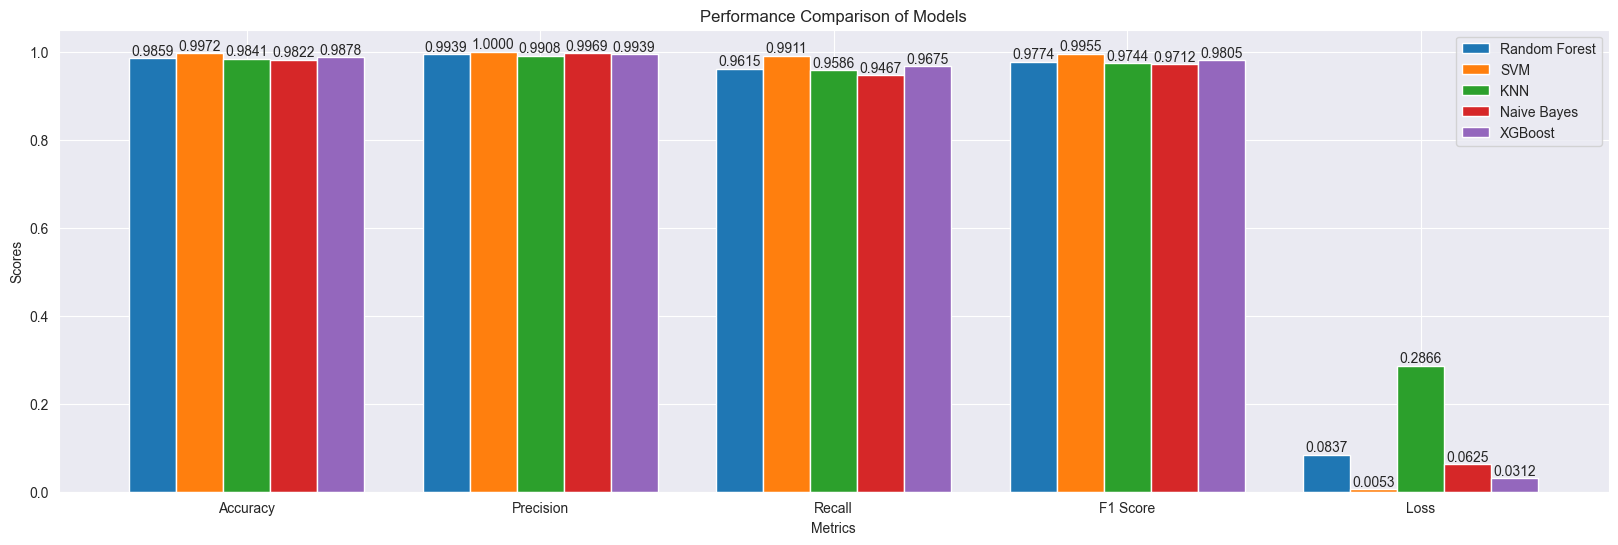

In [227]:
visualize_comparison(accuracy_list_origin, precision_list_origin, recall_list_origin, f1_list_origin, loss_list_origin, model_names_origin)

### 2.2 Model Train Set and Test Set Prediction Comparison

In [228]:
train_results = {
    "Random Forest": y_rf_train_pred,
    "SVM": y_svm_train_pred,
    "KNN": y_knn_train_pred,
    "Naive Bayes": y_nb_train_pred,
    "XGBoost": y_xgb_train_pred
}

In [229]:
train_accuracy = []

for result in train_results:
  y_pred = train_results[result]
  accuracy = accuracy_score(y_train, y_pred)

  train_accuracy.append(accuracy)
  print(f"Train Accuracy for {result}: {accuracy:.4f}")

Train Accuracy for Random Forest: 0.9993
Train Accuracy for SVM: 1.0000
Train Accuracy for KNN: 0.9939
Train Accuracy for Naive Bayes: 0.9801
Train Accuracy for XGBoost: 0.9986


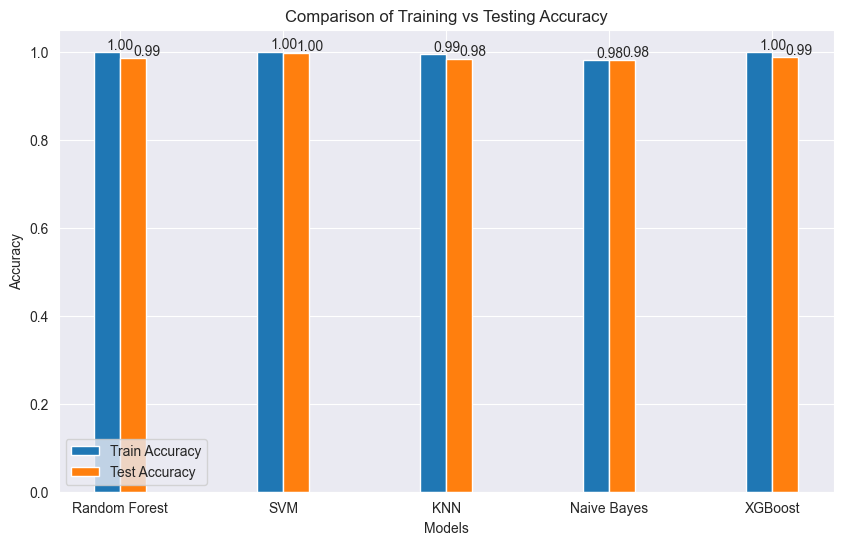

In [230]:
fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
x = np.arange(len(metrics))  # X locations for the groups
width = 0.16

train_bars = ax.bar(x - width/2, train_accuracy, width, label='Train Accuracy')
test_bars = ax.bar(x + width/2, accuracy_list_origin, width, label='Test Accuracy')

# Adding text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training vs Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(model_names_origin)
ax.legend()

# Add numbers above the bars
for bar in train_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment

for bar in test_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')

plt.grid(True)
plt.show()

# 5 Testing on a Different Dataset

## 1 Preprocessing

In [231]:
new_df = pd.read_csv("../datasets/email_data.csv")
# ass_df = ass_df.rename(columns={
#   'text': 'email',
#   'target': 'label',
# })

new_df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [232]:
new_df = preprocess_dataset(new_df)
new_vector_matrix = vectorizer.transform(new_df['preprocessed_email'])
new_vector_df = pd.DataFrame(
  new_vector_matrix.toarray(),
  columns=vectorizer.get_feature_names_out()
)

In [233]:
new_X = new_vector_df
new_X[:5]

,HTML,NUMBER,SPECIAL_CHARACTER,URL,ability,able,absolutely,abuse,accept,acceptable,...,world,worry,worth,write,wrong,ximian,yahoo,year,yes,zzzzteana
0,0.0,0.041612,0.041612,0.100040,0.0,0.160793,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.064211,0.000000,0.154369,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.272793,0.0,0.0,0.0
2,0.0,0.035406,0.000000,0.085119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.150418,0.0,0.0,0.0
3,0.0,0.047547,0.047547,0.114306,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.14434,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.062116,0.000000,0.149332,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.263892,0.0,0.0,0.0


In [234]:
new_X

,HTML,NUMBER,SPECIAL_CHARACTER,URL,ability,able,absolutely,abuse,accept,acceptable,...,world,worry,worth,write,wrong,ximian,yahoo,year,yes,zzzzteana
0,0.0,0.041612,0.041612,0.100040,0.0,0.160793,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.064211,0.000000,0.154369,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.272793,0.000000,0.0,0.0
2,0.0,0.035406,0.000000,0.085119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.150418,0.000000,0.0,0.0
3,0.0,0.047547,0.047547,0.114306,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.14434,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.062116,0.000000,0.149332,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.263892,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,0.0,0.046054,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.134679,0.0,0.0
2868,0.0,0.060896,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
2869,0.0,0.051391,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0
2870,0.0,0.024263,0.000000,0.000000,0.0,0.093753,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.05186,0.0,0.0,0.000000,0.000000,0.0,0.0


In [235]:
new_y = new_df.iloc[:, 1]
new_y[:5]

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## 2 Predicting

In [236]:
accuracy_list_ass, precision_list_ass, recall_list_ass, f1_list_ass, loss_list_ass, model_names_ass = predict_and_evaluate(new_X, new_y)

Evaluation for Random Forest:
Accuracy: 0.8026
Precision: 0.4260
Recall: 0.9438
F1 Score: 0.5870
Loss: 0.5767

Evaluation for SVM:
Accuracy: 0.9781
Precision: 0.9272
Recall: 0.9251
F1 Score: 0.9261
Loss: 0.1104



D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Evaluation for KNN:
Accuracy: 0.9572
Precision: 0.8028
Recall: 0.9438
F1 Score: 0.8676


D:\Programming\Python\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Loss: 0.3601

Evaluation for Naive Bayes:
Accuracy: 0.9338
Precision: 0.7135
Recall: 0.9274
F1 Score: 0.8065
Loss: 0.2126

Evaluation for XGBoost:
Accuracy: 0.8910
Precision: 0.5874
Recall: 0.8970
F1 Score: 0.7099
Loss: 0.3349



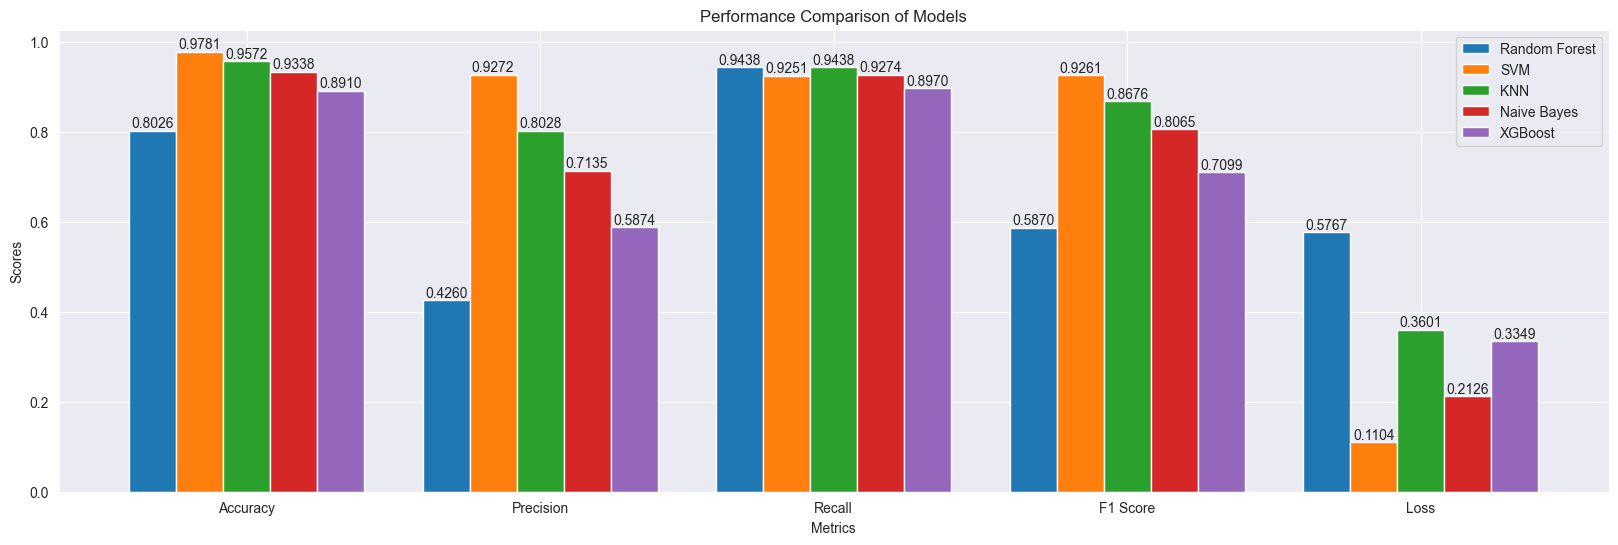

In [237]:
visualize_comparison(accuracy_list_ass, precision_list_ass, recall_list_ass, f1_list_ass, loss_list_ass, model_names_ass)